# Di-lepton analysis

### Introduction

This notebook is used to process the data stored in [NANOAOD](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookNanoAOD) format, and select candidate events of exclusive dilepton production, $pp\to p\oplus\ell\ell\oplus p$, with $\ell\in\{ e,\mu,\tau \} $. Feynman diagram of this process is shown bellow: 

<img src="img/diagrams.png" alt="Feynman diagrams" width="800">



This notebook was prepared based on the [df102_NanoAODDimuonAnalysis.py](https://root.cern.ch/doc/master/group__tutorial__dataframe.html) example from ROOT.

In [1]:
import ROOT
 
# Enable multi-threading
ROOT.ROOT.EnableImplicitMT()

#include auxiliary functions from C++ header
ROOT.gInterpreter.Declare('#include "SelectorTools.h"')

Welcome to JupyROOT 6.24/05


True

In [ ]:
./init.sh

In [ ]:
AWS_CREDENTIALS > ~/.aws/credentials

### Datasets
`Datasets.py` contains the list of datasets that can be used in the analysis. The `listDatasets()` command will print out the complete list of datasets and also information about samples availability on EOS. 

In [2]:
from Datasets import *
listDatasets()

The following datasets are available:
/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/RunIISummer20UL18NanoAODv9-Pilot_106X_upgrade2018_realistic_v15_L1v1-v2/NANOAODSIM (No directories available in EOS for this dataset)
/DYToMuMu_pomflux_Pt-30_TuneCP5_13TeV-pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM (No directories available in EOS for this dataset)
/SingleMuon/Run2017A-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD (No directories available in EOS for this dataset)
/SingleMuon/Run2017B-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD (No directories available in EOS for this dataset)
/SingleMuon/Run2017C-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD (No directories available in EOS for this dataset)
/SingleMuon/Run2017D-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD (No directories available in EOS for this dataset)
/SingleMuon/Run2017E-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD (No directories available in EOS for this dataset)
/SingleMuon/Run2017F-UL2017_MiniAODv2_NanoAODv9-v1/N

### Analysis

Measurement of exclusive production of lepton pairs rely on two selections:
1. Exclusive cuts - leptons are produced exclusively, i.e., no other particles produced during the proton-proton interaction
2. Correlation between leptons and protons: Due to energy-momentum conservation, the following equation holds:
$ \xi_\pm = \frac{1}{\sqrt{s}}\left[ p_{T,\ell1}\cdot e^{\pm\eta_{\ell1}} + p_{T,\ell2}\cdot e^{\pm\eta_{\ell2}} \right] $, where $\xi$ is proton momentum loss, and $\pm$ sign related to $\xi$ reconstruction of positive/negative proton.

The analysis strategy is to apply selection cuts as in (1) and then plot the difference between $\xi$ reconstructed from leptons and $\xi$ measured by PPS. The events where di-lepton kinematics agree with proton kinematics will be candidates for exclusive dilepton production.

---
Proton content is not available in MC yet, so here we will analyze the data, searching for the correlation between measured $\xi$ from the proton and the predicted $\xi$ based on the lepton kinematics. We are using data available on EOS to speed up the analysis. 

For the example, we will process a small amount of data:

In [3]:
#Select which datasets to use
datasets=[
    'Run2018A_DoubleMuon',
    'Run2018B_DoubleMuon',
    'Run2018C_DoubleMuon',
    'Run2018D_DoubleMuon',
]

In [4]:
#Create a list of files to analyze
for ds in datasets:
    listFiles=getFilesForDataset(ds)
files = ROOT.std.vector("string")(len(listFiles))
for i,f in enumerate(listFiles):
    files[i]=f  
print('found %d files'%len(files))

found 0 files


To read the data we will use [RDataFrame](https://root.cern.ch/doc/master/group__tutorial__dataframe.html) interface to work with nanoAOD trees.

In [6]:
RDataFrame = [...].AWS.RDataFrame

df = RDataFrame("Events",files, npartitions=128)

In [8]:
#print number of events in the dataframe:
import logging
logging.basicConfig(level=logging.INFO)
nentries=df.Count()
print("%s entries in the dataframe" %nentries.GetValue())

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:root:Before lambdas invoke. Number of lambdas: 128
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 10
INFO:root:Lambdas finished: 34
INFO:root:Lambdas finished: 52
INFO:root:Lambdas finished: 73
INFO:root:Lambdas finished: 93
INFO:root:Lambdas finished: 102
INFO:root:Lambdas finished: 110
INFO:root:Lambdas finished: 117
INFO:root:Lambdas finished: 122
INFO:root:Lambdas finished: 125
INFO:root:Lambdas finished: 126
INFO:root:Lambdas finished: 126
INFO:root:Lambdas finished: 127
INFO:root:Lambdas finished: 127
INFO:root:Lambdas finished: 127
INFO:root:Lambdas 

(128, 38.9676570892334, 4.1925671100616455, 2.329078435897827)
313532640 entries in the dataframe


Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


# 1. Exclusive cuts

## Event selection

We will skim the dataframe following event selection of the search for exclusive production of muon pairs ([JHEP07(2018)153](https://arxiv.org/abs/1803.04496))

The following cells contain two selection codes:
1. Preselection: which are contain selection cuts that are usually not used for the optimization
2. Selection cuts: These cuts are optimized and are dependent on the preselection cuts.

In [14]:
def preselect_dimuon(df):
    
    #trigger requirement
    trigger_bits='HLT_IsoMu24'

#    trigger_bits='HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8'
    df = df.Filter(trigger_bits,'Trigger')
    
    #muon selection
    good_mu  = 'Muon_pt>30 && abs(Muon_eta)<2.1' #kinematics
    good_mu += '&& Muon_tightId>0 && abs(Muon_pfRelIso04_all)<0.15' #identification + isolation
#    good_mu += '&& Muon_sip3d<4 && abs(Muon_dxy)<0.5 && abs(Muon_dz)<1.0' #vertex association
    df = df.Define('good_mu',good_mu).Filter('Sum(good_mu)==2','Two good muons')
    
    #save the good-muon related varialbes
    for attr in ['pt','eta','phi','charge','mass']:
        df=df.Define('good_mu_{}'.format(attr),'Muon_{}[good_mu]'.format(attr))
#    df = df.Define("Acoplanarity", "abs(acos(cos(good_mu_phi[0]-good_mu_phi[1])))")
#    df = df.Define("mll", "InvariantMass(good_mu_pt, good_mu_eta, good_mu_phi, good_mu_mass)")
   
    return df

def select_dimuon(df):
    
    #charge muon1 != charge muon 2
    df = df.Filter('good_mu_charge[0]!=good_mu_charge[1]','OS Muons')
    
    # Acoplanarity cut (back-to-back muons)
    df = df.Define("Acoplanarity", "1-abs(acos(cos(good_mu_phi[0]-good_mu_phi[1])))/M_PI")
    df = df.Filter('Acoplanarity<0.009','Acoplanarity')
    
    # Mass cut
    df = df.Define("mll", "InvariantMass(good_mu_pt, good_mu_eta, good_mu_phi, good_mu_mass)")
    df = df.Filter('mll>110','mll cut')
    
    # Track selection
    df = df.Filter('nIsoTrack==0','no extra tracks')
       
    return df

In [15]:
#preselection cuts:
df_dimu_presel = preselect_dimuon(df)

In [16]:
# # Request cut-flow report
# report = df_dimu_presel.Report()
# report.Print()

## Pre-selection plots

Before applying analysis cuts here are a few distributions we obtaind from the data:

### acoplanarity

Defined as $A = 1 - |\phi_{\ell,1}-\phi_{\ell,2}|/\pi=1-|\Delta\phi_{\ell\ell}|/\pi$. In exclusive production, both leptons should be back top back in the absence of other particles due to momentum conservation, then $A\sim0$

In [17]:
df_dimu_presel_acopl = df_dimu_presel.Define("Acoplanarity", "1-abs(acos(cos(good_mu_phi[0]-good_mu_phi[1])))/M_PI")

In [18]:
# make histograms
h_acopl = df_dimu_presel_acopl.Histo1D(("Acoplanarity", ";Acoplanarity [rad];N_{Events}", 50, 0, 1), "Acoplanarity")

INFO:root:Before lambdas invoke. Number of lambdas: 128
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 0
INFO:root:Lambdas finished: 2
INFO:root:Lambdas finished: 5
INFO:root:Lambdas finished: 12
INFO:root:Lambdas finished: 20
INFO:root:Lambdas finished: 24
INFO:root:Lambdas finished: 33
INFO:root:

(128, 235.4326455593109, 4.926481008529663, 2.2286012172698975)


Info in <TCanvas::Print>: pdf file dimuon_acoplanarity.pdf has been created


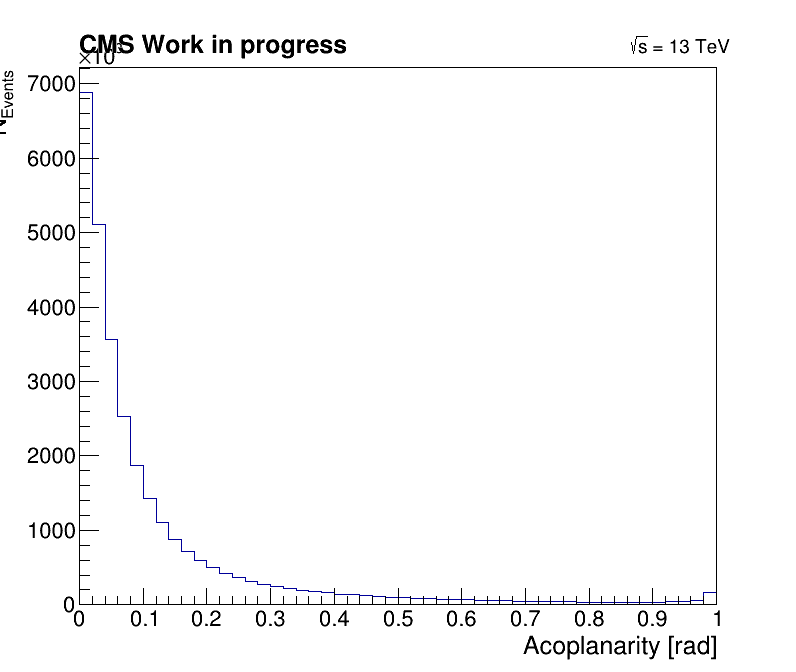

In [19]:
# Produce plots
from Helpers import *
c=PlotMe(h_acopl)
c.Draw()
c.SaveAs("dimuon_acoplanarity.pdf")

### invariant mass

The measurement is performed above the Z mass peak. Invariant mass computed from the two good muons can be obtained using the [ROOT::VecOps::InvariantMass()](https://root.cern/doc/master/group__vecops.html#ga2c531eae910edad48bbf7319cc6d7e58) function

In [14]:
df_dimu_presel_mass = df_dimu_presel.Define("mll", "InvariantMass(good_mu_pt, good_mu_eta, good_mu_phi, good_mu_mass)")
h_mll = df_dimu_presel_mass.Histo1D(("Dimuon_mass", ";m_{#mu#mu} [GeV];N_{Events}", 75, 50, 300), "mll")

DEBUG:DistRDF.Proxy:Created new Define node
DEBUG:DistRDF.Proxy:Created new Histo1D node


In [15]:
# Produce plots
# c=PlotMe(h_mll)
# c.Draw()
# c.SaveAs("dimuon_spectrum.pdf")

# Final event selection

Based on analysis of signal and background distributions obtained in the previous step, final analysis cuts are selected and applied to the dataset

In [16]:
#event selection:
df_dimu_sel = select_dimuon(df_dimu_presel)

DEBUG:DistRDF.Proxy:Created new Filter node
DEBUG:DistRDF.Proxy:Created new Define node
DEBUG:DistRDF.Proxy:Created new Filter node
DEBUG:DistRDF.Proxy:Created new Define node
DEBUG:DistRDF.Proxy:Created new Filter node
DEBUG:DistRDF.Proxy:Created new Filter node


In [17]:
# # Request cut-flow report
# report = df_dimu_sel.Report()
# report.Print()

## Snapshot (saving reduced ntuples for further analysis)

In order to proceed with the analysis, we will skim/slim the sample and store the smaller sub-sample in our local EOS space.
- skimming: selecting sub-sample of events that pass all filters
- slimming: keeping only relevant brunches (columns)

This is done using the [Snapshot()](https://root.cern/doc/master/df007__snapshot_8py.html) function

---
It might be more convenient to save snapshots for a small dataset, then [hadd](https://root.cern/doc/master/hadd_8cxx.html) the files (otherwise it takes too long)

In [18]:
#using regular expression to define needed columns:
branchList='('
branchList+='^mll$|'
branchList+='^Acoplanarity$|'
branchList+='^.*good_mu_.*$|'
branchList+='^nProton_multiRP$|'
branchList+='^.*Proton_multiRP_.*$'
branchList+=')'

In [ ]:
#save the snapshot
import time
PATH='~'
tic=time.time()
snapshot=df_dimu_sel.Snapshot('Events',PATH+'/df_dimu_sel.root',branchList)
print('Creating the snapshot took %2.2f sec' % ((time.time()-tic)))

DEBUG:DistRDF.Proxy:Created new Snapshot node
DEBUG:DistRDF.Node:Starting computational graph pruning
DEBUG:DistRDF.Node:Checking Count node for pruning
DEBUG:DistRDF.Node:Count node shouldn't be pruned
DEBUG:DistRDF.Node:Checking Filter node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Filter node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Histo1D node for pruning
DEBUG:DistRDF.Node:Histo1D node shouldn't be pruned
DEBUG:DistRDF.Node:Define node shouldn't be pruned
DEBUG:DistRDF.Node:Checking Define node for pruning
DEBUG:DistRDF.Node:Checking Histo1D node for pruning
DEBUG:DistRDF.Node:Histo1D node shouldn't be pruned
DEBUG:DistRDF.No

In [ ]:
#check the new filesize:
print('output filesize = %s'%(PrintFileSize(os.path.getsize(PATH+'/df_dimu_sel.root')) ))

In [ ]:
#check the file content:
f1 = ROOT.TFile(PATH+'/df_dimu_sel.root')
t = f1.Events
print("These are the columns:")
for branch in t.GetListOfBranches():
    print("Branch: %s" %branch.GetName())
f1.Close()

### Next time you start - start from here

import relevant modules, and load the snapshot for future studies

In [ ]:
#import ROOT
#ROOT.ROOT.EnableImplicitMT()
#ROOT.gInterpreter.Declare('#include "SelectorTools.h"')
#from Datasets import *
#from Helpers import *

# PATH='.'
# df_dimu_sel = ROOT.RDataFrame("Events",PATH+'/df_dimu_sel.root')
df_dimu_sel=snapshot

# 2. Correlation between leptons and protons

## Tagged protons selection

Once events with exclusive signature have been selected, correlation between the proton kimenatics and lepton kinematics is tested. In exclusive production where leptons and protons have the same origin, full correlation will be observed.

Before starting with the analysis, we will select events with good tagged protons and central event kinematics (di-$\ell$) which predict a proton within the acceptance of the PPS.

### PPS acceptance:

We will extract the acceptance of PPS detectors

In [ ]:
def select_proton_pos(df):
    
    #recontruct xi from di-lepton
    df = df.Define("xi0_ll", "Sum(good_mu_pt*exp(+good_mu_eta))/13000.")
    
    #proton selection
    df = df.Define('xi_pr0','SelectProtonXi(Proton_multiRP_xi,Proton_multiRP_arm,xi0_ll,0)').Filter('xi_pr0>0','proton in the positive arm') # proton in positive direction (+z)
    
    return df

def select_proton_neg(df):
    
    #recontruct xi from di-lepton
    df = df.Define("xi1_ll", "Sum(good_mu_pt*exp(-good_mu_eta))/13000.")

    #proton selection
    df = df.Define('xi_pr1','SelectProtonXi(Proton_multiRP_xi,Proton_multiRP_arm,xi1_ll,1)').Filter('xi_pr1>0','proton in the negative arm') # proton in negative direction (-z)
    
    return df

In [ ]:
df_dimu_sel_pro0 = select_proton_pos(df_dimu_sel)

minVal0 = df_dimu_sel_pro0.Min('xi_pr0')
maxVal0 = df_dimu_sel_pro0.Max('xi_pr0')
print("Positive arm acceptance:%s <= xi <= %s" %(minVal0.GetValue(), maxVal0.GetValue()))
 

In [ ]:
#filter events with reconstructed xi from di-lep is outside PPS acceptance
#df_dimu_sel_pro0_withll = df_dimu_sel_pro0.Filter('xi0_ll>%s && xi0_ll<%s'%(minVal0.GetValue(), maxVal0.GetValue()),'dilep predict a proton in +z')
df_dimu_sel_pro0_withll = df_dimu_sel_pro0.Filter('xi0_ll>%s && xi0_ll<%s'%(0.04, maxVal0.GetValue()),'dilep predict a proton in +z')

In [ ]:
# report = df_dimu_sel_pro0_withll.Report()
# report.Print()

In [ ]:
df_dimu_sel_pro1 = select_proton_neg(df_dimu_sel)

minVal1 = df_dimu_sel_pro1.Min('xi_pr1')
maxVal1 = df_dimu_sel_pro1.Max('xi_pr1')
print("Negative arm acceptance:%s <= xi <= %s" %(minVal1.GetValue(), maxVal1.GetValue()))
 

In [ ]:
#filter events with reconstructed xi from di-lep is outside PPS acceptance
#df_dimu_sel_pro1_withll = df_dimu_sel_pro1.Filter('xi1_ll>%s && xi1_ll<%s'%(minVal1.GetValue(), maxVal1.GetValue()),'dilep predict a proton in -z')
df_dimu_sel_pro1_withll = df_dimu_sel_pro1.Filter('xi1_ll>%s && xi1_ll<%s'%(0.04, maxVal1.GetValue()),'dilep predict a proton in -z')

In [ ]:
# report = df_dimu_sel_pro1_withll.Report()
# report.Print()

Once the PPS acceptance is extracted, and we selected events where two-lepton kinematics suggest a proton within the PPS detector, we can inspect correlations.

In [ ]:
df_dimu_sel_pro0_withll_delXi = df_dimu_sel_pro0_withll.Define('DelXi','xi0_ll-xi_pr0')
h_xi0 = df_dimu_sel_pro0_withll_delXi.Histo1D(("Delta_xi0", ";#xi_{ll}-#xi_{p+};N_{Events}", 100, -0.1, 0.1), "DelXi")

In [ ]:
# Produce plots
c=PlotMe(h_xi0)
c.Draw()
c.SaveAs("correlation_positive_arm.pdf")

In [ ]:
df_dimu_sel_pro1_withll_delXi = df_dimu_sel_pro1_withll.Define('DelXi','xi1_ll-xi_pr1')
h_xi1 = df_dimu_sel_pro1_withll_delXi.Histo1D(("Delta_xi1", ";#xi_{ll}-#xi_{p-};N_{Events}", 100, -0.1, 0.1), "DelXi")

In [ ]:
 # Produce plots
c=PlotMe(h_xi1)
c.Draw()
c.SaveAs("correlation_negative_arm.pdf")

In [ ]:
h_xi1_2D = df_dimu_sel_pro1_withll.Histo2D(("negXi_2D", ";#xi_{ll};#xi_{pp}", 64, 0., 0.2, 32, 0., 0.2), "xi1_ll", "xi_pr1");

In [ ]:
 # Produce plots
c=PlotMe(h_xi1_2D,'colz')
c.Draw('colz') 
line=ROOT.TF1('line','x',0,0.2)
line.SetLineWidth(3); line.Draw('sames')
c.SaveAs("correlation_negative_arm_2D.pdf")